In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv

--2025-05-16 03:05:30--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/dataset_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 510280 (498K) [text/plain]
Saving to: ‘dataset_regresion.csv.2’

dataset_regresion.c 100%[===================>] 498.32K  --.-KB/s    in 0.05s   

2025-05-16 03:05:31 (10.0 MB/s) - ‘dataset_regresion.csv.2’ saved [510280/510280]



In [ ]:
# Inicio, requisitos de software
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from google.colab import drive
print(np.__version__)

2.0.2


# **Integrantes**:

* Ricardo Yañez Rios
* Alvaro Concha Gutierrez

# Descripción del negocio

✅ **Nombre del negocio:** PeopleGrow Solutions

✅ **Industria:** Consultoría de desarrollo organizacional y gestión de talento

✅ **Objetivo del negocio:** Optimizar las estrategias de compensación salarial para mejorar la retención del talento y la satisfacción laboral, considerando múltiples factores del perfil de los empleados.

**Antecedentes**

PeopleGrow Solutions trabaja con empresas que buscan alinear sus políticas salariales con indicadores clave como nivel educativo, experiencia laboral, satisfacción de los empleados y modalidad de trabajo (presencial/remoto). La empresa ha recolectado datos sobre empleados de distintas áreas para entender qué factores están más fuertemente asociados con la variación en los salarios mensuales.

# Objetivo del proyecto

Desarrollar un modelo de regresión que permita predecir el salario mensual de un empleado, basándose en el perfil educativo, experiencia laboral, nivel de satisfacción, características del puesto y otras variables disponibles dentro del set de datos

Esto permitirá:

✅ Identificar brechas salariales entre departamentos o niveles educativos.

✅ Diseñar políticas de compensación equitativas y competitivas.

✅ Detectar factores críticos que contribuyen a una mayor remuneración.

✅ Simular escenarios de promoción o cambio de modalidad de trabajo y su impacto salarial.

# Pregunta clave

Esta pregunta debe encontrar la respuesta en la fase 2 de entendimiento de los datos

✔ ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

# Fase 2 - Entendimiento de los datos

In [ ]:
# Fase 2 - Entendimiento de los datos
# Cargar el dataset, mostrar una vista general
df = pd.read_csv("dataset_regresion.csv")

# Mostrar una vista general e informacion
print("\nPrimeras filas del dataset:\n")
display(df.head())

# Info tambien nos provee con la cantidad de nulos en el dataset.
print("\nInformación del dataset:\n")
df.info()


Primeras filas del dataset:



,ID,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual
0,1,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50
1,2,46,Universitaria,23,TI,17,Muy Alta,No,6375.40
2,3,32,Técnica,13,TI,8,Media,No,4883.02
3,4,60,Secundaria,37,Finanzas,7,Alta,No,6739.09
4,5,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60



Información del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  int64  
 1   Edad                         10000 non-null  int64  
 2   Nivel_Educativo              10000 non-null  object 
 3   Experiencia_Anios            10000 non-null  int64  
 4   Departamento                 10000 non-null  object 
 5   Horas_Entrenamiento_Mensual  10000 non-null  int64  
 6   Satisfaccion_Laboral         10000 non-null  object 
 7   Remoto                       10000 non-null  object 
 8   Salario_Mensual              10000 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 703.3+ KB


In [ ]:
# Estadísticas descriptivas de variables numericas y categoricas
print("\nEstadísticas descriptivas (numéricas):\n")
display(df.describe())

print("\nEstadísticas descriptivas (categóricas):\n")
display(df.describe(include='object'))


Estadísticas descriptivas (numéricas):



,ID,Edad,Experiencia_Anios,Horas_Entrenamiento_Mensual,Salario_Mensual
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,41.557600,20.46160,10.000000,5764.693974
std,2886.89568,13.749581,13.23976,3.183711,1659.896370
min,1.00000,18.000000,0.00000,0.000000,1773.680000
25%,2500.75000,30.000000,9.00000,8.000000,4364.367500
50%,5000.50000,41.500000,20.00000,10.000000,5788.975000
75%,7500.25000,53.000000,32.00000,12.000000,7177.292500
max,10000.00000,65.000000,40.00000,23.000000,9641.940000



Estadísticas descriptivas (categóricas):



,Nivel_Educativo,Departamento,Satisfaccion_Laboral,Remoto
count,10000,10000,10000,10000
unique,4,5,4,2
top,Universitaria,Marketing,Alta,No
freq,3444,2077,3914,5902


In [ ]:
df.isna().sum()

,0
ID,0
Edad,0
Nivel_Educativo,0
Experiencia_Anios,0
Departamento,0
Horas_Entrenamiento_Mensual,0
Satisfaccion_Laboral,0
Remoto,0
Salario_Mensual,0


In [ ]:
# Eliminacion de variable irrelebante para el modelo
df = df.drop(['ID'],axis=1)

In [ ]:
# Distribución de categorías (educación, satisfacción, etc.)
print("\nDistribución de Nivel Educativo:\n")
display(df["Nivel_Educativo"].value_counts())

print("\nDistribución de Satisfacción Laboral:\n")
display(df["Satisfaccion_Laboral"].value_counts())

print("\nDistribución por Departamento:\n")
display(df["Departamento"].value_counts())

print("\nDistribución por Modalidad (Remoto):\n")
display(df["Remoto"].value_counts())


Distribución de Nivel Educativo:



,count
Nivel_Educativo,
Universitaria,3444
Técnica,3032
Secundaria,1965
Postgrado,1559



Distribución de Satisfacción Laboral:



,count
Satisfaccion_Laboral,
Alta,3914
Media,3026
Muy Alta,2016
Baja,1044



Distribución por Departamento:



,count
Departamento,
Marketing,2077
Ventas,2023
TI,1988
Finanzas,1965
Recursos Humanos,1947



Distribución por Modalidad (Remoto):



,count
Remoto,
No,5902
Sí,4098


In [ ]:
# Correlación de las variables con el salario mensual
corr_matrix = df[df.describe().columns].corr()
corr_matrix["Salario_Mensual"].sort_values(ascending=False)

,Salario_Mensual
Salario_Mensual,1.000000
Experiencia_Anios,0.954013
Edad,0.943406
Horas_Entrenamiento_Mensual,0.014064


In [ ]:
# ¿Existen diferencias salariales significativas entre empleados remotos y presenciales?

print("\nCalculo de correlacion\n")
df['Remoto_Num'] = df['Remoto'].map({'No': 0, 'Sí': 1})
correlacion = df['Salario_Mensual'].corr(df['Remoto_Num'])
print(f"La correlación entre Salario y Trabajo Remoto es: {correlacion}")

print("\nComparacion de estadisticas descriptivas\n")
print(df.groupby('Remoto')['Salario_Mensual'].describe())


Calculo de correlacion

La correlación entre Salario y Trabajo Remoto es: 0.03876893875972126

Comparacion de estadisticas descriptivas

         count         mean          std      min        25%      50%  \
Remoto                                                                  
No      5902.0  5711.073636  1666.146518  1773.68  4305.5600  5741.49   
Sí      4098.0  5841.918775  1647.992633  2133.23  4457.6025  5844.23   

              75%      max  
Remoto                      
No      7152.0225  9641.94  
Sí      7236.1350  9508.63  


Como se observa en el calculo de la correlacion el valor es muy cercano a 0, asi mismo, en la comparacion estadistica no se obserban grander diferencias entre los valores estadisticos, por lo que no hay una aparente relacion positiva o negativa entre el salario mensual y si el trabajo es remoto o no.




# Fase 3 - Preparación de los datos

## Tratamiento de valores atipicos


In [ ]:
# Calcula y muestra el intervalo exacto de la mayor concentración
mean, std = np.mean(df.Salario_Mensual), np.std(df.Salario_Mensual)
lim_inf, lim_sup = mean - 2*std, mean + 2*std
print("Límite inferior {0:.1f} - Límite superior : {1:.1f}".format(lim_inf, lim_sup))

#indices atipicos
print(df.query('Salario_Mensual < @lim_inf or Salario_Mensual > @lim_sup'))

# Eliminacion de valores atipicos
df.drop(df.query('Salario_Mensual < @lim_inf or Salario_Mensual > @lim_sup').index, inplace=True)
df.head()

Límite inferior 2445.1 - Límite superior : 9084.3
      Edad Nivel_Educativo  Experiencia_Anios      Departamento  \
146     59       Postgrado                 40            Ventas   
293     65       Postgrado                 40                TI   
449     18      Secundaria                  0  Recursos Humanos   
498     22         Técnica                  0            Ventas   
647     61       Postgrado                 40  Recursos Humanos   
...    ...             ...                ...               ...   
8985    21      Secundaria                  0          Finanzas   
9243    59       Postgrado                 40         Marketing   
9348    61       Postgrado                 40         Marketing   
9689    21      Secundaria                  3  Recursos Humanos   
9749    23      Secundaria                  2         Marketing   

      Horas_Entrenamiento_Mensual Satisfaccion_Laboral Remoto  \
146                            11             Muy Alta     Sí   
293            

,Edad,Nivel_Educativo,Experiencia_Anios,Departamento,Horas_Entrenamiento_Mensual,Satisfaccion_Laboral,Remoto,Salario_Mensual,Remoto_Num
0,56,Universitaria,38,Marketing,11,Alta,Sí,8230.50,1
1,46,Universitaria,23,TI,17,Muy Alta,No,6375.40,0
2,32,Técnica,13,TI,8,Media,No,4883.02,0
3,60,Secundaria,37,Finanzas,7,Alta,No,6739.09,0
4,25,Universitaria,7,Marketing,8,Alta,Sí,4729.60,1


## Tratamiento de variables categoricas


In [ ]:
df.describe(include = np.object_)

,Nivel_Educativo,Departamento,Satisfaccion_Laboral,Remoto
count,9936,9936,9936,9936
unique,4,5,4,2
top,Universitaria,Marketing,Alta,No
freq,3439,2066,3900,5865


# Separacion de data frame con todas las categorias y solo categorias seleccionadas

Por cuestiones practicas aquí se seleccionan las variables para el resto del código, las conclusiones e interpretaciones para ambas configuraciones estarán señaladas más adelante.

In [ ]:
# Respaldo data original
df_para_encoding = df.copy()

In [ ]:
# Ejecutar para configurar todas las variables
variableselegidas = ['Edad', 'Experiencia_Anios', 'Nivel_Educativo', 'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral', 'Remoto', 'Departamento']
df_para_encoding.head()

nombre_modelo_guardado = 'modelo_ALL'

In [ ]:
# Ejecutar para configurar solo las variables seleccionadas por equipo
variableselegidas = ['Nivel_Educativo', 'Experiencia_Anios', 'Departamento', 'Salario_Mensual']

df_para_encoding.drop(columns=['Edad', 'Remoto', 'Remoto_Num', 'Horas_Entrenamiento_Mensual', 'Satisfaccion_Laboral'])
df_para_encoding.head()

nombre_modelo_guardado = 'modelo_PICK'

In [ ]:
# Implementacion OneHotEncoder

# Separa variables independientes de la dependiente
df_encodificado = pd.get_dummies(df_para_encoding, columns=df_para_encoding.describe(include = np.object_).columns, drop_first=True, dtype=int)
df_encodificado.head()
# Verificamos columnas resultantes
print("Columnas codificadas:")
display(df_encodificado.columns)

# Separamos variables independientes (X) y la variable objetivo (y)
X = df_encodificado.drop(columns='Salario_Mensual')
y = df_encodificado["Salario_Mensual"]

# Visualizamos
display(X.head())
display(y.head())

# División entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=29)

Columnas codificadas:


Index(['Edad', 'Experiencia_Anios', 'Horas_Entrenamiento_Mensual',
       'Salario_Mensual', 'Remoto_Num', 'Nivel_Educativo_Secundaria',
       'Nivel_Educativo_Técnica', 'Nivel_Educativo_Universitaria',
       'Departamento_Marketing', 'Departamento_Recursos Humanos',
       'Departamento_TI', 'Departamento_Ventas', 'Satisfaccion_Laboral_Baja',
       'Satisfaccion_Laboral_Media', 'Satisfaccion_Laboral_Muy Alta',
       'Remoto_Sí'],
      dtype='object')

,Edad,Experiencia_Anios,Horas_Entrenamiento_Mensual,Remoto_Num,Nivel_Educativo_Secundaria,Nivel_Educativo_Técnica,Nivel_Educativo_Universitaria,Departamento_Marketing,Departamento_Recursos Humanos,Departamento_TI,Departamento_Ventas,Satisfaccion_Laboral_Baja,Satisfaccion_Laboral_Media,Satisfaccion_Laboral_Muy Alta,Remoto_Sí
0,56,38,11,1,0,0,1,1,0,0,0,0,0,0,1
1,46,23,17,0,0,0,1,0,0,1,0,0,0,1,0
2,32,13,8,0,0,1,0,0,0,1,0,0,1,0,0
3,60,37,7,0,1,0,0,0,0,0,0,0,0,0,0
4,25,7,8,1,0,0,1,1,0,0,0,0,0,0,1


,Salario_Mensual
0,8230.50
1,6375.40
2,4883.02
3,6739.09
4,4729.60


# Fase 4 - Modelamiento

## LinearRegression

R squared of the Linear Regression on training set: 96.69%
R squared of the Linear Regression on test set: 96.78%


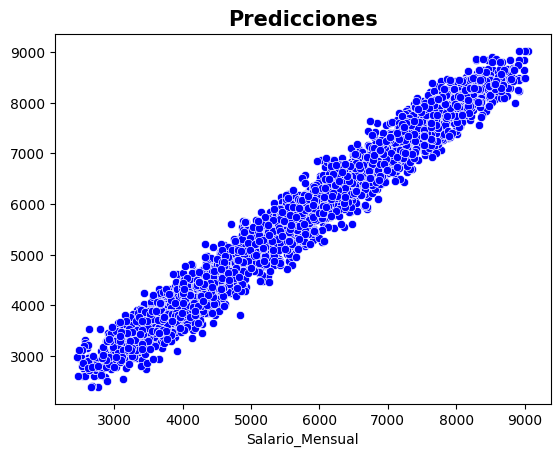

In [ ]:
# Creación del modelo
linreg = LinearRegression()
# Entrenamiento del modelo
linreg.fit(X_train, y_train)

# Evaluación del modelo
print("R squared of the Linear Regression on training set: {:.2%}".format(linreg.score(X_train, y_train)))
print("R squared of the Linear Regression on test set: {:.2%}".format(linreg.score(X_test, y_test)))

# Realiza predicciones
y_pred = linreg.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred, color="blue")
plt.title("Predicciones", fontsize=15, fontweight="bold");

# Guarda resultados
history1 = {"LinearRegression" : [linreg, linreg.score(X_test, y_test)]}

## DecisionTreeRegressor

R squared of the Decision Tree Regressor on training set: 99.97%
R squared of the Decision Tree Regressor on test set: 92.44%


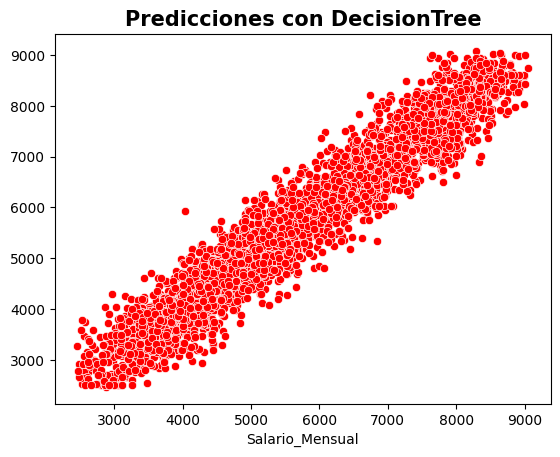

In [ ]:
# Creación del modelo
model_tree = DecisionTreeRegressor(random_state=29)
# Entrenamiento del modelo
model_tree.fit(X_train, y_train)

# Evaluación del modelo
print("R squared of the Decision Tree Regressor on training set: {:.2%}".format(model_tree.score(X_train, y_train)))
print("R squared of the Decision Tree Regressor on test set: {:.2%}".format(model_tree.score(X_test, y_test)))

# Realiza predicciones
y_pred_tree = model_tree.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred_tree, color="red")
plt.title("Predicciones con DecisionTree", fontsize=15, fontweight="bold");

# Guarda resultados
history1["DecisionTreeRegressor"] = [model_tree, model_tree.score(X_test, y_test)]

## RandomForestRegressor

R squared of the Random Forest Regressor on training set: 99.39%
R squared of the Random Forest Regressor on test set: 95.95%


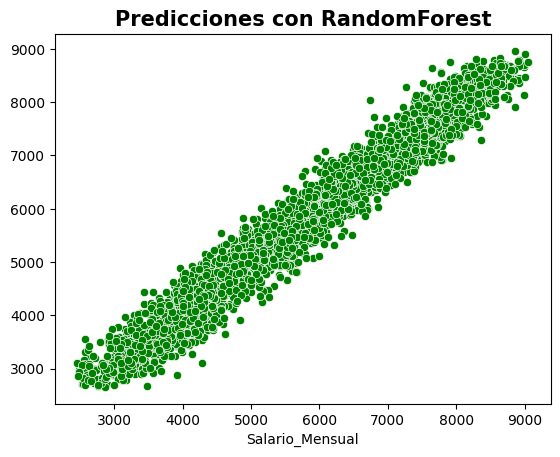

In [ ]:
# Creación del modelo
model_rf = RandomForestRegressor(n_estimators=100, random_state=29)
# Entrenamiento del modelo
model_rf.fit(X_train, y_train)

# Evaluación
print("R squared of the Random Forest Regressor on training set: {:.2%}".format(model_rf.score(X_train, y_train)))
print("R squared of the Random Forest Regressor on test set: {:.2%}".format(model_rf.score(X_test, y_test)))

# Realiza predicciones
y_pred_rf = model_rf.predict(X_test)
sns.scatterplot(x=y_test , y=y_pred_rf, color="green")
plt.title("Predicciones con RandomForest", fontsize=15, fontweight="bold");

# Guarda resultados
history1["RandomForestRegressor"] = [model_rf, model_rf.score(X_test, y_test)]

# Fase 5 - Evaluación

In [ ]:
history1

{'LinearRegression': [LinearRegression(), 0.9677554134801121],
 'DecisionTreeRegressor': [DecisionTreeRegressor(random_state=29),
  0.9244340162791007],
 'RandomForestRegressor': [RandomForestRegressor(random_state=29),
  0.9595033707900817]}

### LinearRegressor

In [ ]:
# Evaluando el Modelo de Regresión Lineal

d = {"real": y_test, "prediccion": y_pred}
df_lr = pd.DataFrame(data=d)
df_lr["delta"] = df_lr["prediccion"]-df_lr["real"]

print(df_lr)
print("\nMean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print("Mean Squared Log Error: {:.2%}".format(mean_squared_log_error(y_test, y_pred)))

         real   prediccion       delta
2484  7757.83  7532.163787 -225.666213
3609  6574.07  7095.822072  521.752072
9685  3859.84  3956.943669   97.103669
3525  5845.34  6271.631944  426.291944
2593  6232.98  6534.700358  301.720358
...       ...          ...         ...
9611  6665.18  6382.825888 -282.354112
8616  3969.23  3552.393391 -416.836609
9848  6986.64  6675.482115 -311.157885
6622  6136.23  6490.624927  354.394927
2532  3527.93  3131.530389 -396.399611

[3279 rows x 3 columns]

Mean Absolute Error: 235.15
Mean Squared Log Error: 0.34%


### DecisionTreeRegressor

In [ ]:
# Evaluando el Modelo de Árbol de Decisión de regresión

d = {"real": y_test, "prediccion": y_pred_tree}
df_dt = pd.DataFrame(data=d)
df_dt["delta"] = df_dt["prediccion"]-df_dt["real"]
df_dt

print(df_lr)
print("\nMean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_pred_tree)))
print("Mean Squared Log Error: {:.2%}".format(mean_squared_log_error(y_test, y_pred_tree)))

         real   prediccion       delta
2484  7757.83  7532.163787 -225.666213
3609  6574.07  7095.822072  521.752072
9685  3859.84  3956.943669   97.103669
3525  5845.34  6271.631944  426.291944
2593  6232.98  6534.700358  301.720358
...       ...          ...         ...
9611  6665.18  6382.825888 -282.354112
8616  3969.23  3552.393391 -416.836609
9848  6986.64  6675.482115 -311.157885
6622  6136.23  6490.624927  354.394927
2532  3527.93  3131.530389 -396.399611

[3279 rows x 3 columns]

Mean Absolute Error: 356.28
Mean Squared Log Error: 0.79%


### RandomForest

In [ ]:
# # Evaluando el Modelo de Random Forest de árboles de decisión

d = {"real": y_test, "prediccion": y_pred_rf}
df_rf = pd.DataFrame(data=d)
df_rf["delta"] = df_rf["prediccion"]-df_rf["real"]
df_rf

print(df_lr)
print("\nMean Absolute Error: {:.2f}".format(mean_absolute_error(y_test, y_pred_rf)))
print("Mean Squared Log Error: {:.2%}".format(mean_squared_log_error(y_test, y_pred_rf)))

         real   prediccion       delta
2484  7757.83  7532.163787 -225.666213
3609  6574.07  7095.822072  521.752072
9685  3859.84  3956.943669   97.103669
3525  5845.34  6271.631944  426.291944
2593  6232.98  6534.700358  301.720358
...       ...          ...         ...
9611  6665.18  6382.825888 -282.354112
8616  3969.23  3552.393391 -416.836609
9848  6986.64  6675.482115 -311.157885
6622  6136.23  6490.624927  354.394927
2532  3527.93  3131.530389 -396.399611

[3279 rows x 3 columns]

Mean Absolute Error: 261.87
Mean Squared Log Error: 0.43%


### Tabla de resultados

,Modelo,Instancia,R2 Train,R2 Test,MAE,MSLE,Overfitting
0,LinearRegression,LinearRegression(),0.966943,0.967755,235.147073,0.003433,No
1,DecisionTreeRegressor,DecisionTreeRegressor(random_state=29),0.999660,0.924434,356.279706,0.007861,No
2,RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.993873,0.959503,261.865348,0.004294,No



Mejor modelo seleccionado automáticamente: LinearRegression


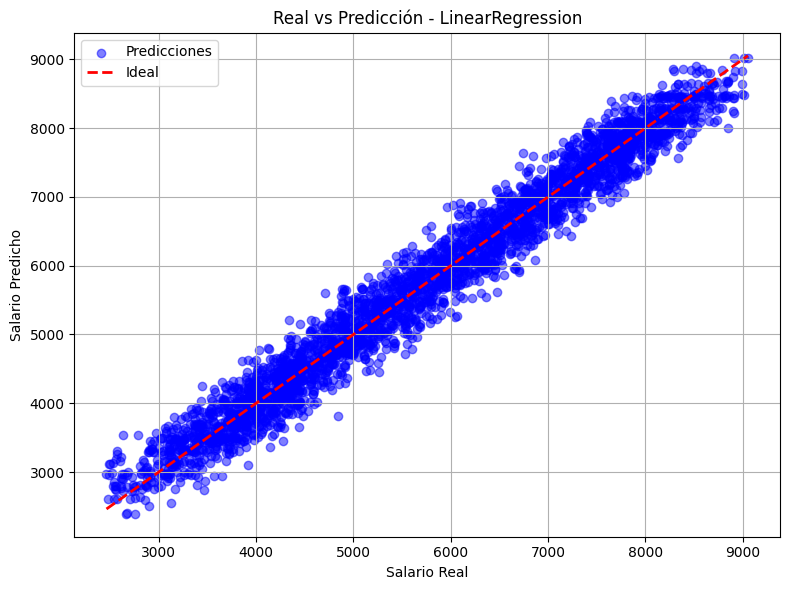

In [ ]:
# Umbral de overfitting (ajustable)
def is_overfitting(r2_train, r2_test, threshold=0.1):
    return 'Sí' if (r2_train - r2_test) > threshold else 'No'

# Evaluación de modelos
model_data = []

for model_name, (model, r2_test) in history1.items():
    r2_train = model.score(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred)
    overfitting = is_overfitting(r2_train, r2_test)

    model_data.append([model_name, model, r2_train, r2_test, mae, msle, overfitting])

# Crear DataFrame con resultados
results_df = pd.DataFrame(model_data, columns=['Modelo', 'Instancia', 'R2 Train', 'R2 Test', 'MAE', 'MSLE', 'Overfitting'])

# Mostrar la tabla
display(results_df)

# Selección automática del mejor modelo:
# Criterio: Maytor R2 Tes, menor MAE, sin overfitting
candidatos = results_df[results_df['Overfitting'] == 'No']
mejor_modelo = candidatos.sort_values(by=['R2 Test', 'MAE'], ascending=[False, True]).iloc[0]

print(f"\nMejor modelo seleccionado automáticamente: {mejor_modelo['Modelo']}")

# Extraer instancia del modelo y predecir
modelo_final = mejor_modelo['Instancia']
y_pred_final = modelo_final.predict(X_test)

# Gráfico Real vs Predicción
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Salario Real")
plt.ylabel("Salario Predicho")
plt.title(f"Real vs Predicción - {mejor_modelo['Modelo']}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Seleccion del mejor modelo

Para elegir el mejor modelos tomo en cuenta la diferencia entre R2 train y R2 test, que indica si el modelo se ajusto bien con los datos de entrenamiento.

Ademas se tomo en cuenta el MAE y MSLE menor, que indica cuanto es el error de la prediccion con respecto a los datos reales, a menor son estos valores, menos margen de error


Mejor modelo seleccionado automáticamente: LinearRegression


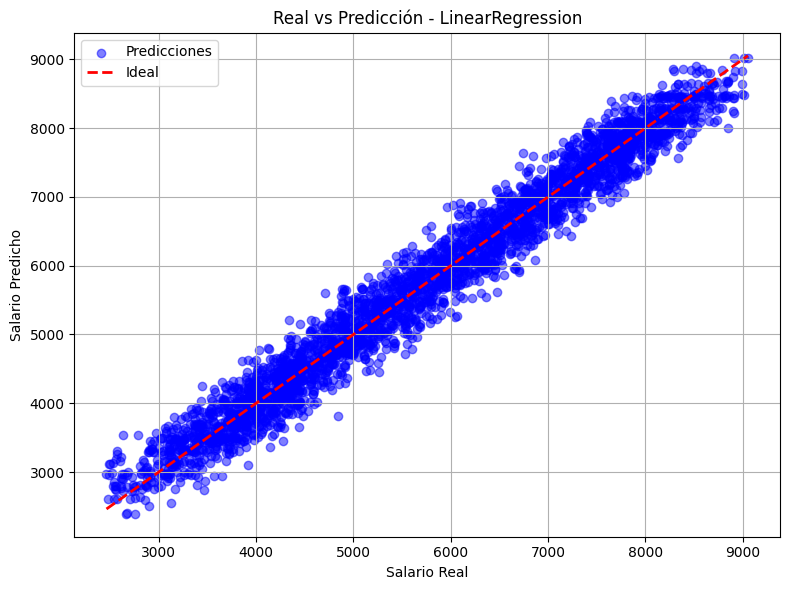

In [ ]:
# Selección automática del mejor modelo:
# Criterio: Mayor R2 Test, menor MAE, sin overfitting
candidatos = results_df[results_df['Overfitting'] == 'No']
mejor_modelo = candidatos.sort_values(by=['R2 Test', 'MAE'], ascending=[False, True]).iloc[0]

print(f"\nMejor modelo seleccionado automáticamente: {mejor_modelo['Modelo']}")

# Extraer instancia del modelo y predecir
modelo_final = mejor_modelo['Instancia']
y_pred_final = modelo_final.predict(X_test)

# Gráfico Real vs Predicción
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_final, alpha=0.5, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Salario Real")
plt.ylabel("Salario Predicho")
plt.title(f"Real vs Predicción - {mejor_modelo['Modelo']}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusiones

## Mejor modelo con todas las catogorias

Luego de comparar múltiples algoritmos de regresión, el modelo **LinearRegression** fue seleccionado como el más adecuado para predecir el salario mensual de los empleados. Esta elección se fundamenta en una evaluación objetiva de métricas de rendimiento y generalización, como se muestra en la tabla comparativa.

Esto se debe a los siguientes factores:
* Obtuvo un coeficiente de determinación R2 en el conjunto de prueba del 95%, lo que indica que el modelo explica casi el 95% de la variabilidad en los salarios mensuales utilizando las variables categóricas seleccionadas.
* Registró el menor error absoluto medio (MAE ~= 236) y también el menor error logarítmico medio (MSLE ~= 0.35%), lo que confirma que las predicciones son lo mas presisas posibles o el menor marguen de error.
* A diferencia de otros modelos evaluados (como DecisionTreeRegressor o RandomForestRegressor), LinearRegression no presenta signos de sobreajuste. Es decir, su rendimiento en los datos de entrenamiento y prueba es consistente, lo que garantiza que puede generalizar adecuadamente a nuevos empleados.

Mejor modelo con las categorias seleccionadas

# Fase 6

Guardado del mejor modelo

In [ ]:
# Conexion con drive
drive.mount('/content/drive')

# Primero, se abre un nuevo archivo para almacenar el mejor modelo y poder llamarlo
# Especifica la ruta completa dentro de tu Google Drive
file_model = open(f'/content/drive/My Drive/modelos_salario/{nombre_modelo_guardado}', 'wb')
# Guarda en el archivo el mejor modelo
pickle.dump(mejor_modelo , file_model)
# Cerrar el archivo
file_model.close()

## Carga de archivo JSON con datos completamente nuevos

## Generación de JSON con las predicciones del mejor modelo